# Sample People Analytics Dataset - Justin Fleury

## Import Necessary Packages

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
pd.options.display.max_rows = None
%matplotlib inline

## Dataframe Creation

In [47]:
employee_data = [
['E00001', '12/01', 25, 23],
['E00001', '12/02', 25, 21],
['E00001', '12/03', 30, 29],
['E00001', '01/04', 'NA', 20],
['E00001', '01/05', 30, 19],
['E00002', '12/01', 31, 17],
['E00002', '12/02', 33, 16],
['E00002', '12/03', 29, 16],
['E00003', '12/01', 25, 26],
['E00003', '12/02', 32, 27],
['E00003', '11/03', 28, 28],
['E00004', '11/01', 29, 27],
['E00004', '11/02', 27, 27],
['E00004', '11/03', 'NA', 25],
['E00004', '12/04', 25, 24],
['E00004', '12/05', 25, 23],
['E00004', '12/06', 29, 23],
['E00004', '12/07', 31, 23],
['E00005', '12/01', 25, 21],
['E00006', '12/02', 18, 16],
['E00006', '12/03', 19, 14],
['E00006', '01/01', 19, 19],
['E00007', '10/01', 24, 23]
]

In [48]:
manager_data = [
['M0001', 'E00001', 'USA'],
['M0001', 'E00002', 'USA'],
['M0001', 'E00003', 'USA'],
['M0002', 'E00004', 'USA'],
['M0002', 'E00005', 'USA'],
['M0002', 'E00006', 'USA'],
['M0003', 'E00007', 'IND'],
]

Create separate dataframes to store employee and manager information

In [49]:
emp_df = pd.DataFrame(employee_data, columns = ['employee_id','date','phone_calls','satisfied'])
manager_df = pd.DataFrame(manager_data, columns = ['manager_id','direct_report_id','country'])

## Table Preview

Employee table information

In [50]:
print("Table size: ", emp_df.shape, "\n")
print(emp_df.info())
emp_df.head()

Table size:  (23, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
employee_id    23 non-null object
date           23 non-null object
phone_calls    23 non-null object
satisfied      23 non-null int64
dtypes: int64(1), object(3)
memory usage: 864.0+ bytes
None


,employee_id,date,phone_calls,satisfied
0,E00001,12/01,25,23
1,E00001,12/02,25,21
2,E00001,12/03,30,29
3,E00001,01/04,NA,20
4,E00001,01/05,30,19


Manager table information

In [51]:
print("Table size: ", manager_df.shape, "\n")
print(manager_df.info())
manager_df.head()

Table size:  (7, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
manager_id          7 non-null object
direct_report_id    7 non-null object
country             7 non-null object
dtypes: object(3)
memory usage: 296.0+ bytes
None


,manager_id,direct_report_id,country
0,M0001,E00001,USA
1,M0001,E00002,USA
2,M0001,E00003,USA
3,M0002,E00004,USA
4,M0002,E00005,USA


## Data Cleaning

Convert "NA" values to nulls

In [52]:
emp_df = emp_df.replace("NA", np.nan)
emp_df.head()

,employee_id,date,phone_calls,satisfied
0,E00001,12/01,25.0,23
1,E00001,12/02,25.0,21
2,E00001,12/03,30.0,29
3,E00001,01/04,NaN,20
4,E00001,01/05,30.0,19


### Q4: Compute a column that imputes missing values with the average number of phone calls for that employee

In [54]:
# find records where values are null
# corresponds to employee E00001 and E00004
emp_df.loc[emp_df.phone_calls.isnull() == True]

,employee_id,date,phone_calls,satisfied
3,E00001,01/04,NaN,20
13,E00004,11/03,NaN,25


In [71]:
# impute the average for both records
emp_df.loc[3,'phone_calls'] = emp_df.loc[(emp_df.phone_calls.isnull() == False) & (emp_df.employee_id == 'E00001')].phone_calls.mean()
emp_df.loc[13,'phone_calls'] = emp_df.loc[(emp_df.phone_calls.isnull() == False) & (emp_df.employee_id == 'E00004')].phone_calls.mean()

In [72]:
# average is 27.5 for employee E00001
emp_df.loc[emp_df.index == 3]

,employee_id,date,phone_calls,satisfied
3,E00001,01/04,27.5,20


In [73]:
# average is 27.67 for employee E00004
emp_df.loc[emp_df.index == 13]

,employee_id,date,phone_calls,satisfied
13,E00004,11/03,27.666667,25


Display entire employee table again to check results:

In [75]:
emp_df

,employee_id,date,phone_calls,satisfied
0,E00001,12/01,25.000000,23
1,E00001,12/02,25.000000,21
2,E00001,12/03,30.000000,29
3,E00001,01/04,27.500000,20
4,E00001,01/05,30.000000,19
5,E00002,12/01,31.000000,17
6,E00002,12/02,33.000000,16
7,E00002,12/03,29.000000,16
8,E00003,12/01,25.000000,26
9,E00003,12/02,32.000000,27


### Q1: Create a column that captures the daily satisfaction rate per employee

Assume daily satisfaction rate defined as number of satisfied clients/number of phone calls

In [76]:
emp_df['satisfaction_rate'] = round(emp_df.satisfied/emp_df.phone_calls, 2)
emp_df.head()

,employee_id,date,phone_calls,satisfied,satisfaction_rate
0,E00001,12/01,25.0,23,0.92
1,E00001,12/02,25.0,21,0.84
2,E00001,12/03,30.0,29,0.97
3,E00001,01/04,27.5,20,0.73
4,E00001,01/05,30.0,19,0.63


If we want to determine the average satisfaction rate per employee instead:

In [78]:
emp_df.groupby('employee_id').mean().satisfaction_rate

employee_id
E00001    0.818000
E00002    0.526667
E00003    0.960000
E00004    0.891429
E00005    0.840000
E00006    0.876667
E00007    0.960000
Name: satisfaction_rate, dtype: float64

### Q2: Compute a column that captures the average monthly satisfaction rate per employee

Assume average monthly satisfaction rate is average of monthly sum(satisfied)/sum(phone_calls)

In [80]:
# create a separate month column
emp_df['month'] = emp_df.date.apply(lambda x: x[:2])
emp_df.head()

,employee_id,date,phone_calls,satisfied,satisfaction_rate,month
0,E00001,12/01,25.0,23,0.92,12
1,E00001,12/02,25.0,21,0.84,12
2,E00001,12/03,30.0,29,0.97,12
3,E00001,01/04,27.5,20,0.73,01
4,E00001,01/05,30.0,19,0.63,01


In [93]:
# create a dataframe of summed values per employee and month
agg = emp_df.groupby(['employee_id','month']).sum()[['satisfied','phone_calls']].sort_values(['employee_id','month'], ascending = [True,True])
agg

satisfied  phone_calls
employee_id month                        
E00001      01            39    57.500000
            12            73    80.000000
E00002      12            49    93.000000
E00003      11            28    28.000000
            12            53    57.000000
E00004      11            79    83.666667
            12            93   110.000000
E00005      12            21    25.000000
E00006      01            19    19.000000
            12            30    37.000000
E00007      10            23    24.000000

In [94]:
# satisfaction rates computed per month for each employee
agg['satisfaction_rate'] = round(agg.satisfied/agg.phone_calls, 2)
agg

satisfied  phone_calls  satisfaction_rate
employee_id month                                           
E00001      01            39    57.500000               0.68
            12            73    80.000000               0.91
E00002      12            49    93.000000               0.53
E00003      11            28    28.000000               1.00
            12            53    57.000000               0.93
E00004      11            79    83.666667               0.94
            12            93   110.000000               0.85
E00005      12            21    25.000000               0.84
E00006      01            19    19.000000               1.00
            12            30    37.000000               0.81
E00007      10            23    24.000000               0.96

Finally, display average monthly satisfaction rates:

In [105]:
# finally, display average monthly satisfaction rates
agg.groupby('employee_id').satisfaction_rate.mean()

employee_id
E00001    0.795
E00002    0.530
E00003    0.965
E00004    0.895
E00005    0.840
E00006    0.905
E00007    0.960
Name: satisfaction_rate, dtype: float64

### Q3: Compute a column that captures the number of direct reports each manager has

Count the aggregate rows per manager id.

In [108]:
# M0001: 3, M0002: 3, M0003: 1
manager_df.groupby('manager_id').direct_report_id.count()

manager_id
M0001    3
M0002    3
M0003    1
Name: direct_report_id, dtype: int64

### Q5: Compute a column that captures the overall min, mean, and max number of phone calls per country 

Requires a join of the two tables on employee_id

In [112]:
# left join to extract country info from manager table
merged_df = pd.merge(emp_df, manager_df, how='left', left_on='employee_id', right_on='direct_report_id')
merged_df.head()

,employee_id,date,phone_calls,satisfied,satisfaction_rate,month,manager_id,direct_report_id,country
0,E00001,12/01,25.0,23,0.92,12,M0001,E00001,USA
1,E00001,12/02,25.0,21,0.84,12,M0001,E00001,USA
2,E00001,12/03,30.0,29,0.97,12,M0001,E00001,USA
3,E00001,01/04,27.5,20,0.73,01,M0001,E00001,USA
4,E00001,01/05,30.0,19,0.63,01,M0001,E00001,USA


In [118]:
# find min, mean, max phone calls per country
merged_df.groupby('country').phone_calls.agg(['min','mean','max'])

,min,mean,max
country,,,
IND,24.0,24.000000,24.0
USA,18.0,26.825758,33.0


### Q6: Compute a column that standardizes the overall satisfaction rate

Typical statistical standardization involves measuring standard deviations above or below the mean. We will subtract the satisfaction rate from the mean and divide by thte standard deviation.

In [127]:
# create function to standardize values
def standardize(x):
    return (x-emp_df.satisfaction_rate.mean())/emp_df.satisfaction_rate.std()

In [129]:
emp_df['std_satisfaction_rate'] = emp_df.satisfaction_rate.apply(lambda x: standardize(x))
emp_df

,employee_id,date,phone_calls,satisfied,satisfaction_rate,month,std_satisfaction_rate
0,E00001,12/01,25.000000,23,0.92,12,0.526070
1,E00001,12/02,25.000000,21,0.84,12,0.027117
2,E00001,12/03,30.000000,29,0.97,12,0.837916
3,E00001,01/04,27.500000,20,0.73,01,-0.658944
4,E00001,01/05,30.000000,19,0.63,01,-1.282636
5,E00002,12/01,31.000000,17,0.55,12,-1.781589
6,E00002,12/02,33.000000,16,0.48,12,-2.218173
7,E00002,12/03,29.000000,16,0.55,12,-1.781589
8,E00003,12/01,25.000000,26,1.04,12,1.274501
9,E00003,12/02,32.000000,27,0.84,12,0.027117


### Q7:  Create a histogram of the standardized overall satisfaction rate created on #6 using matplotlib or ggplot

Distribution skewed to the left, with most observations lying above the mean.

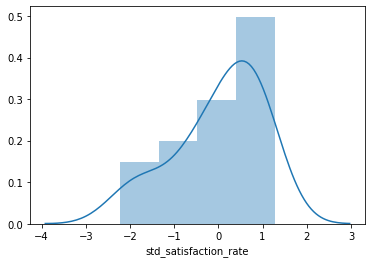

In [144]:
# number of bins default by Freedman-Diaconis rule
sns.distplot(emp_df.std_satisfaction_rate)